## Regularization 

<ul>
<li>A model will have a low accuracy if it is overfitting. </li>
<li>Overfitting occurs when model is trying too hard to capture the noise (samples that don't represent true pattern)
    in your training dataset.</li>
<li>When model is more flexible, it is prone to overfitting</li>
<li>Regularization shrinks the coefficients (parameter or slops) towards zero to discourages a more complex or flexible model, so as to avoid the risk of overfitting</li>
    <li>Ridge and Lasso are two options </li>
    <li>Regularization strength is provided by parameter <b>alpha</b></li>
</ul>    

In [173]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings(action='ignore')

In [174]:
X_train = pd.DataFrame({'sqft':[1000,2000,3000,4000,5000]})
y_train = pd.Series([40,65,70,80,85])
X_test = pd.DataFrame({'sqft':[2200,1000,4200,2100] })
y_test = pd.Series([65,45,80,60])

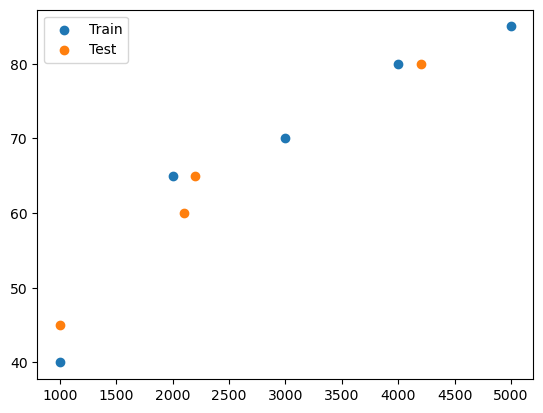

In [175]:
plt.scatter(X_train.sqft, y_train, label='Train')
plt.scatter(X_test.sqft, y_test, label = 'Test')
plt.legend()

### LinearRegression

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [177]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [178]:
lr_model.coef_

array([0.0105])

In [179]:
y_pred = lr_model.predict(X_train)

In [180]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  25.49999999999998
RMSE     :  5.049752469181037
R2 Score :  0.8963414634146343


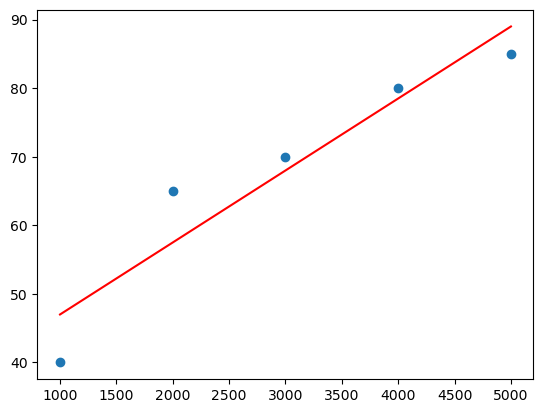

In [181]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred,'r-')

In [182]:
y_pred = lr_model.predict(X_test)

In [183]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  8.905625000000008
RMSE     :  2.984229381264116
R2 Score :  0.943004


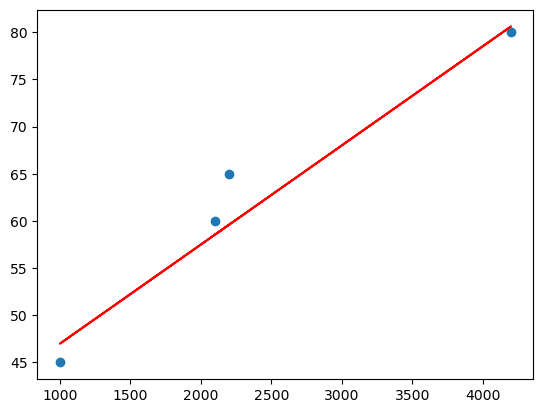

In [184]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred,'r-')

## Ridge Regression (L2)

In [185]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [186]:
# ss = StandardScaler()
# X_train_scaled = ss.fit_transform(X_train)

In [211]:
ridge = Ridge(alpha=5.0)
ridge.fit(X_train,y_train)

Ridge(alpha=5.0)

In [210]:
ridge.coef_

array([0.01049999])

In [189]:
y_pred = ridge.predict(X_train)

In [190]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  25.500000000055145
RMSE     :  5.049752469186499
R2 Score :  0.89634146341441


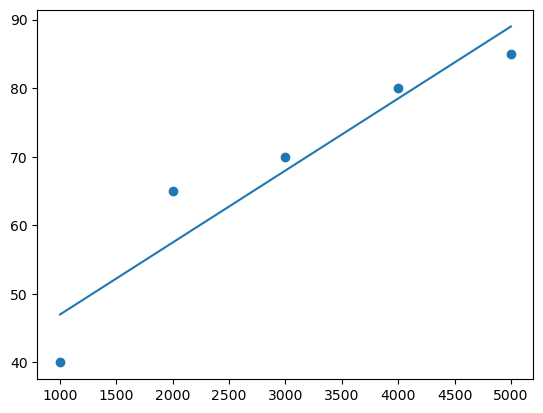

In [191]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [192]:
y_pred = ridge.predict(X_test)

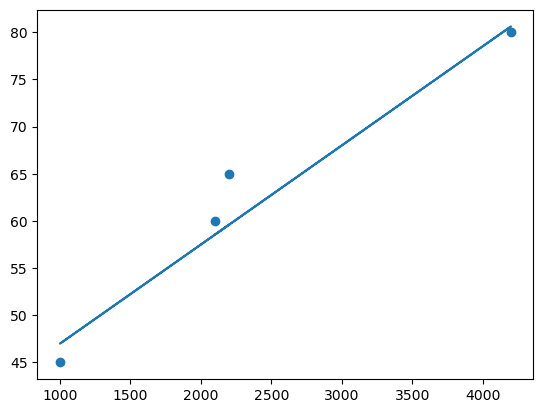

In [193]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [213]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  8.905478464414072
RMSE     :  2.984204829500494
R2 Score :  0.94300493782775


## LassoCV

In [195]:
from sklearn.linear_model import LassoCV

In [215]:
lasso = LassoCV(cv = 3, alphas = [.25, .5, 1, 2,4,6])
lasso.fit(X_train,y_train)

LassoCV(alphas=[0.25, 0.5, 1, 2, 4, 6], cv=3)

In [216]:
lasso.coef_

array([0.01049988])

In [214]:
lasso.alpha_

0.25

In [199]:
y_pred = lasso.predict(X_train)

In [200]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  25.50000003125002
RMSE     :  5.0497524722752525
R2 Score :  0.8963414632876016


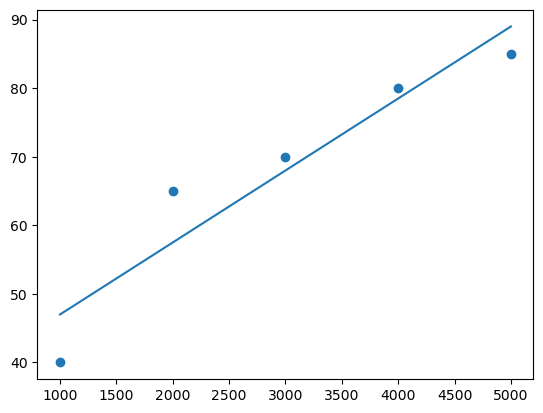

In [201]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [202]:
y_pred = lasso.predict(X_test)

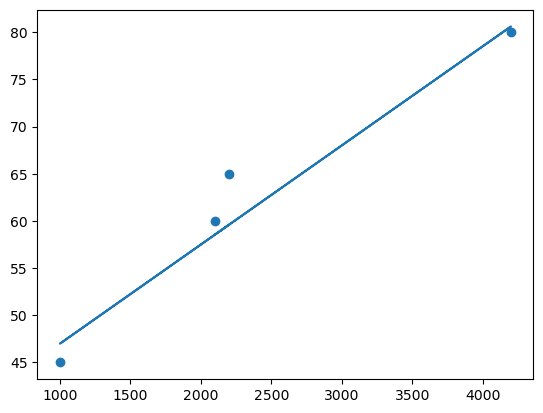

In [203]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [204]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  8.905478464414072
RMSE     :  2.984204829500494
R2 Score :  0.94300493782775
